# Building an Image Classifier

Today we are going to implement a simple neural network in order to classify and distinguish between handwritten digits. In other words, we are implementing an image classifier. The total structure of the classifier that we are going to build is shown in the following image. As simple as that!

We will use MNIST, a very famouse dataset which contains 55000 images of digits with their labels for training and also, 10,000 more images for testing. At the end, our simple classifier will be able to classify images with the accuracy of around 92%!

I will show you and explain to you step by step what we are going to do and the reason behind that. You can press the Run button to run each step and move on to the next one. If you are courious and when it is possible, you can change some values to see their effect on the performance and running time (values of the variables that have CAPITAL names). Codes are written for Python 3, with the assumption that you already have installed Tensorflow on your computer. 

What we are doing today is based on a tutorial presented on the Tensorflow's webpage:

https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners

I also used some of the helpful functions that were written on this very interesting blog post:

https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow


<img src="Images/Total_Network.png">



## Loading Libraries

Before anything, let's bring some libraries that we need for plotting the results and of course for calculating them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Loading MNIST Dataset

Our goal for today is to create a neural network image classifier that is capable of classifying handwritten digits. So the first step would be to have a dataset of handwritten digits. MNIST is a very famous dataset that contains more than 60K images along with their labels. They divided the images into two parts, 55,000 images for training and 10,000 images for testing the performance of the classifier. Each image is labeled by a person and that's our ground truth. All the labels are also included in the dataset. Images are 28\*28 pixels.

<img src="Images/mnist_plot-800x600.png">

Let's load the MNIST dataset.
This may take a while especially the first time since it has to download the Dataset from the internet first. You will see some warnings that you can ignore...

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Defining some functions for displaying the digits and flattening them

We need to define some simple functions for flattening and displaying the data. 

The function display_digit() will pick a random image from the MNIST Train dataset and will show it along with it's label.

The function display_mult_flat(batch_size) will pick a random subset of images from the MNIST Train dataset, with the size of batch_size. It will then flatten each 28\*28 image to a 1\*784 wide image and show all of them at once. More details about image flattening will be explained later.

In [3]:
def display_digit():
    x_train, y_train = mnist.train.next_batch(1)
    print(y_train)
    label = y_train.argmax(axis=1)
    image = x_train.reshape([28,28])
    plt.title('Example Label: ' +  str(label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(batch_size):
    x_train, y_train = mnist.train.next_batch(batch_size)
    images = x_train[0].reshape([1,784])
    for i in range(1, batch_size):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

Let's see a random image from the MNIST Train Folder and its label...

The labe is in the hot-vector format, which means since each digit can be between 0-9, each lable is a list with the length of 10, all members are zero except the one representing the true number. 

For example, if the image is showing a '9', its label will be: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], and if the image is showing a '3', its label will be: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


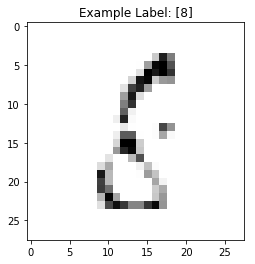

In [4]:
display_digit()

## Training a Neural Network Model

Here is how a neural network model will be trained in layman terms. We show the model a bunch of images, it will make some random guesses the first time and produce some results (that will probably be garbage). It will then compare the results with the ground truth labels of those images and realize how bad the results are. It will then modify itself in a way to have a better guesses next time. We then show it another bunch of images. The model will guess some results, but since it already has seen some images, this time it will have a better guess. Then again, it will compare its results with the labels. It will continue this cycle for a while, or until its performance would not change anymore.

Training a neural network model is like showing someone who does not know about Marvel superheroes a collection of superhero images. At first, the guy does not know the name of superheroes, and his guesses can be completely irrelavant.

<img src="Images/First_Guess.PNG">


Then we show hime where he is wrong and what are their correct names. Then he would say that he understood, but probably not entirely... Next time we show him some new images and he will guess the names again.

<img src="Images/Second_Guess.PNG">


Not bad, he got some names right. But there is still room for improvement. We let him know where he was wrong and what are their correct names. Then again, we will test him with more images of superheroes...

<img src="Images/Third_Guess.PNG">

Finally! He got them all right :)

That's exactly how the training works. We will give it random image batches several times and everytime it will improve its results.



## Image Flatenning

Now that we have MNIST images ready, we can give them to the model as input. Each image is gray (not RGB) with the width and height of 28\*28. Each pixel values is in range of [0, 255] where 0 means black and 255 means white. We need to make each image flat in order to feed it to the neural network. Therefore by flattening each image, we will have a vector with size of 1\*784.

<img src="Images/Image_Flattening.png">

Every time we feed the model with several image altogether. We call this package of images a batch. 
In the following piece of code, you can see a picture of a batch of random flatted images. We have 784 columns and each row represents one image. You can change the batch size (number of rows) to see how it changes the picture.

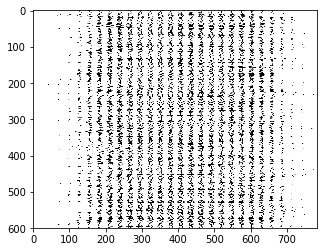

In [5]:
BATCH_SIZE = 600
display_mult_flat(BATCH_SIZE)

## Construct the model with Tensorflow

After loading the MNIST images and now that we figured out how we want to feed the images to the model, now it is time to construct the actual neural network model. In order to do that we need to work with Google Tensorflow. Tensorflow is an application for working with graphes, i.e. nodes and edges. Let's load the Tensorflow and start it.


In [6]:
import tensorflow as tf
sess = tf.Session()

The model that we have in mind is very simple and you can see its design in the following picture. 
Assuming that we want to feed only one image to the model for now, the input of our model contains 784 nodes, each representing one pixel of the image, and the output has 10 nodes, representing 10 digits. Input nodes are shown with green color and output nodes are shown with red. I will talk about the blue nodes later. Each red node represents one number. Based on the values of the green nodes, each red node will have a different score/value. For each image, we want its represented node to have the highest score among the others. For example, if the image represents an '8' we would like the ninth node to have the highest score (first node is the representative of number zero).

Score of each red node will be calculated based on the effect of each pixel. For each red node, we want pixels (green nodes) that show the number in the input image to be more important and have higher effect. This way, the score of that node will be higher. This can be done by using the yellow weigths. As you can see, W is a table of 784\*10 and each member of this matrix represnets the importance of that pixel to that number final result. For example, the value in row 12 and column 5 shows us how much the 12th pixels is important in recognizing images of number 4 (first red node represents number zero).

In addition to the effect of each pixel on the digit recognition, we also want to add some independency from the pixel values to the score calculation. That can be done by adding a separate constant number to each red nodes calculation.

Therefore, for each red node, the score will be calculated by the following equation:
<img src="Images/Score_Calculation.PNG">

<img src="Images/Model_Details_1.PNG">


We define X and Y_ as placeholders as they are the only things we have for now and we will get them from the MNIST dataset...

When we assign None to our placeholder, it means the placeholder can be fed as many examples as you want to give it. In this case, our placeholder can be fed any multitude of 784-sized values. We define them this way because we want to give image batches to the network, not just one image.

We then define y_, which will be used to feed y_train into. This will be used later so we can compare the ground truths to our predictions. We can also think of our labels as classes:


In [7]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Next, we will define the weights W and bias b. These two values are the only values we will need to optimize to calculate our prediction after the classifier is trained.

We will first set our weight and bias values to zeros because TensorFlow will optimize these values later. Notice how our W is a collection of 784 values for each of the 10 classes:

In [8]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

And finally, based on the mentioned equation, we define score vector S as:

In [9]:
S = tf.matmul(x,W) + b

## Softmax Function

After calculating the score of nodes based on the input images, we need a function to "normalize" the result. We need each result node to have a value between 0 to 1, and also the sum of the values should be 1. The Softmax function will do this for us.

<img src="Images/Model_Details_2.PNG">

In [10]:
y = tf.nn.softmax(S)

Let's start with a simple example, when you have a batch of images with size 7 and you want to know the initial result of the network for them (you can change the  BATCH_SIZE if you want). Since the original weights W and b are zero at first, the scores all will be zero. Therefore the result y after applying the Softmax function will assign the same probability (0.1) to all the output nodes (blue ones). 

In [11]:
BATCH_SIZE = 7
x_train, y_train = mnist.train.next_batch(BATCH_SIZE)
sess.run(tf.global_variables_initializer())
print(sess.run(y, feed_dict={x: x_train}))

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


As another example, let's think we only have 4 nodes with the value of zero (or any other equal values) and we want to see the result of applying softmax function on them:

In [12]:
test_result_1 = tf.nn.softmax(tf.zeros([4]))
sess.run(test_result_1)

array([0.25, 0.25, 0.25, 0.25], dtype=float32)

To make the results more interesting, assume the input of the Softmax function is as follows:
input = [-100.1, 100.005, 102, 100.1, 100.005, 102, 100.1, 100.005, 102, 100.3]
Let's see how the output would look like (you can change them if you like):

In [13]:
TEST_RESULT_2 = tf.nn.softmax(tf.constant([-100.1, 100.005, 102, 100.1, 100.005, 102, 100.1, 100.005, 102, 100.3]))
sess.run(TEST_RESULT_2)

array([0.        , 0.03496611, 0.25707862, 0.03845084, 0.03496611,
       0.25707862, 0.03845084, 0.03496611, 0.25707862, 0.04696417],
      dtype=float32)

## Comparing the results with ground truth labels

Now that the network has predicted some results, it is time to compare them with actual labels. By comparing the results and the labels we can come up with a measurement of inaccuracy. This measurement is called several names such as loss function or cost function. 
Based on this loss function and using a backpropagation algorithm, the network will train itself to have a better performance next time we feed it an image batch. Backpropagation using Gradient Descent will change the weights W and b in a way to decrease the loss function. Backpropagation is a complicated confusing process and it is better for today to not go into details about it.

<img src="Images/Comparing_Results.PNG">



## Loss function (Cross Entropy)
Next, we will create our loss function, also known as cost function. It measures how good (or bad) we are doing at classifying. The higher the cost, the higher the level of inaccuracy. Considering only one image, it calculates accuracy by comparing the true values from y_ to the results of our prediction y for each example. The goal is to minimize the loss. One way to calculate the loss function is to compute the Cross Entropy of the predicted results y and true labels y_. Cross Entropy is a measurment of scattering. It will have higher values when all the result nodes have very similar values or when the predicted values are higher where they should not be. It will have lower values when predicted results are close to zero everywhere except the right node.

When we calculated the Cross Entropy for each image, we average them to have the total Cross Entropy, i.e. the loss function, of the network regarding the image batch.

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

As an example, assume the predicted result for an image is:

In [15]:
PREDICTED_RESULT = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]

And we have two different scenarios, 1) when the network has guessed correctly and 2) when the predicted results are indicating a wrong number.

In [16]:
TEST_LABEL_1 = [0,0,0,1,0,0,0,0,0,0]
TEST_LABEL_2 = [0,0,0,0,0,0,0,0,0,1]

Let's see how the Cross Entropy in these situations would look like:

In [17]:
cross_entropy_1 = np.sum(-np.multiply(TEST_LABEL_1, np.log(PREDICTED_RESULT)))
cross_entropy_2 = np.sum(-np.multiply(TEST_LABEL_2, np.log(PREDICTED_RESULT)))
print('cross_entropy_1 (correct prediction): ' + str(cross_entropy_1))
print('cross_entropy_2 (wrong prediction): ' + str(cross_entropy_2))

cross_entropy_1 (correct prediction): 0.10536051565782628
cross_entropy_2 (wrong prediction): 5.991464547107982


You can change the PREDICTED_RESULT, TEST_LABEL_1, and TEST_LABEL_2 to see how they affect the Cross Entropy outputs.

## Let's run the model
Now that we know about all the pieces let's put all of them together, initialize all variables so that they can be used by our TensorFlow graph and initialize the graph. The graph will be as described:

<img src="Images/Total_Network.png">

TRAIN_STEPS is the number of times we feed the network random image batches (with the size TRAIN_BATCH_SIZE). Accordingly the network will try to optimize itself for TRAIN_STEPS times. Every 100 steps we check the accuracy by using the network that we have and feed a batch of unseen images from the MNIST Test folder. Size of this batch is TEST_BATCH_SIZE. On the other hand, Loss will be calculated based on the Train image batch. We also save the table of weights W to show how they evolve in the next section.

We can now initialize the TensorFlow graph:


In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

S = tf.matmul(x,W) + b

y = tf.nn.softmax(S)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

LEARNING_RATE = 0.1
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

TRAIN_STEPS = 2500
TRAIN_BATCH_SIZE = 200
TEST_BATCH_SIZE = 2000

init = tf.global_variables_initializer()
sess.run(init)
weight = sess.run(W)
W_List = [weight]
for i in range(TRAIN_STEPS+1):
    x_train, y_train = mnist.train.next_batch(TRAIN_BATCH_SIZE)
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        x_test, y_test = mnist.test.next_batch(TEST_BATCH_SIZE)
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))
        weight = sess.run(W)
        W_List.append(weight)

print('\n\n Done! The network is trained which means weights (W and b) are optimized...')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Training Step:0  Accuracy =  0.2715  Loss = 2.1406786
Training Step:100  Accuracy =  0.865  Loss = 0.601163
Training Step:200  Accuracy =  0.8835  Loss = 0.49833047
Training Step:300  Accuracy =  0.885  Loss = 0.44867077
Training Step:400  Accuracy =  0.8965  Loss = 0.37036118
Training Step:500  Accuracy =  0.9115  Loss = 0.4340677
Training Step:600  Accuracy =  0.8915  Loss = 0.3921051
Training Step:700  Accuracy =  0.91  Loss = 0.30226913
Training Step:800  Accuracy =  0.8965  Loss = 0.31537193
Training Step:900  Accuracy =  0.917  Loss = 0.2959428
Training Step:1000  Accuracy =  0.902  Loss = 0.37458375
Training Step:1100  Accuracy =  0.917  Loss = 0.36800995
Training Step:1200  Accuracy =  0.914  Loss = 0.34191895
Training Step:1300  Accuracy =  0.9105  Loss = 0.32030883
Training Step:1400  

Now let's see the weights evolution in the first NUMBER_OF_ITERATIONS. This code will show us how the weights W have changed during the training. Weight are for calculating the scores S based on the input pixels. We are showing the trained weights for calculating each score node (red node in the picture).

<img src="Images/Weights.PNG">


In [19]:
def showTheWeights(number_of_iterations, W_List):
    w=28
    h=28
    fig=plt.figure(figsize=(28, 28))
    columns = 10
    rows = NUMBER_OF_ITERATIONS
    for row_index in range(number_of_iterations):
        temp_W = W_List[row_index]
        for col_index in range (10):
            weight = temp_W[:,col_index]
            img = weight.reshape([28,28])
            i = 10*row_index + col_index + 1
            fig.add_subplot(rows, columns, i)
            plt.imshow(img, cmap=plt.get_cmap('seismic'))
    plt.show()

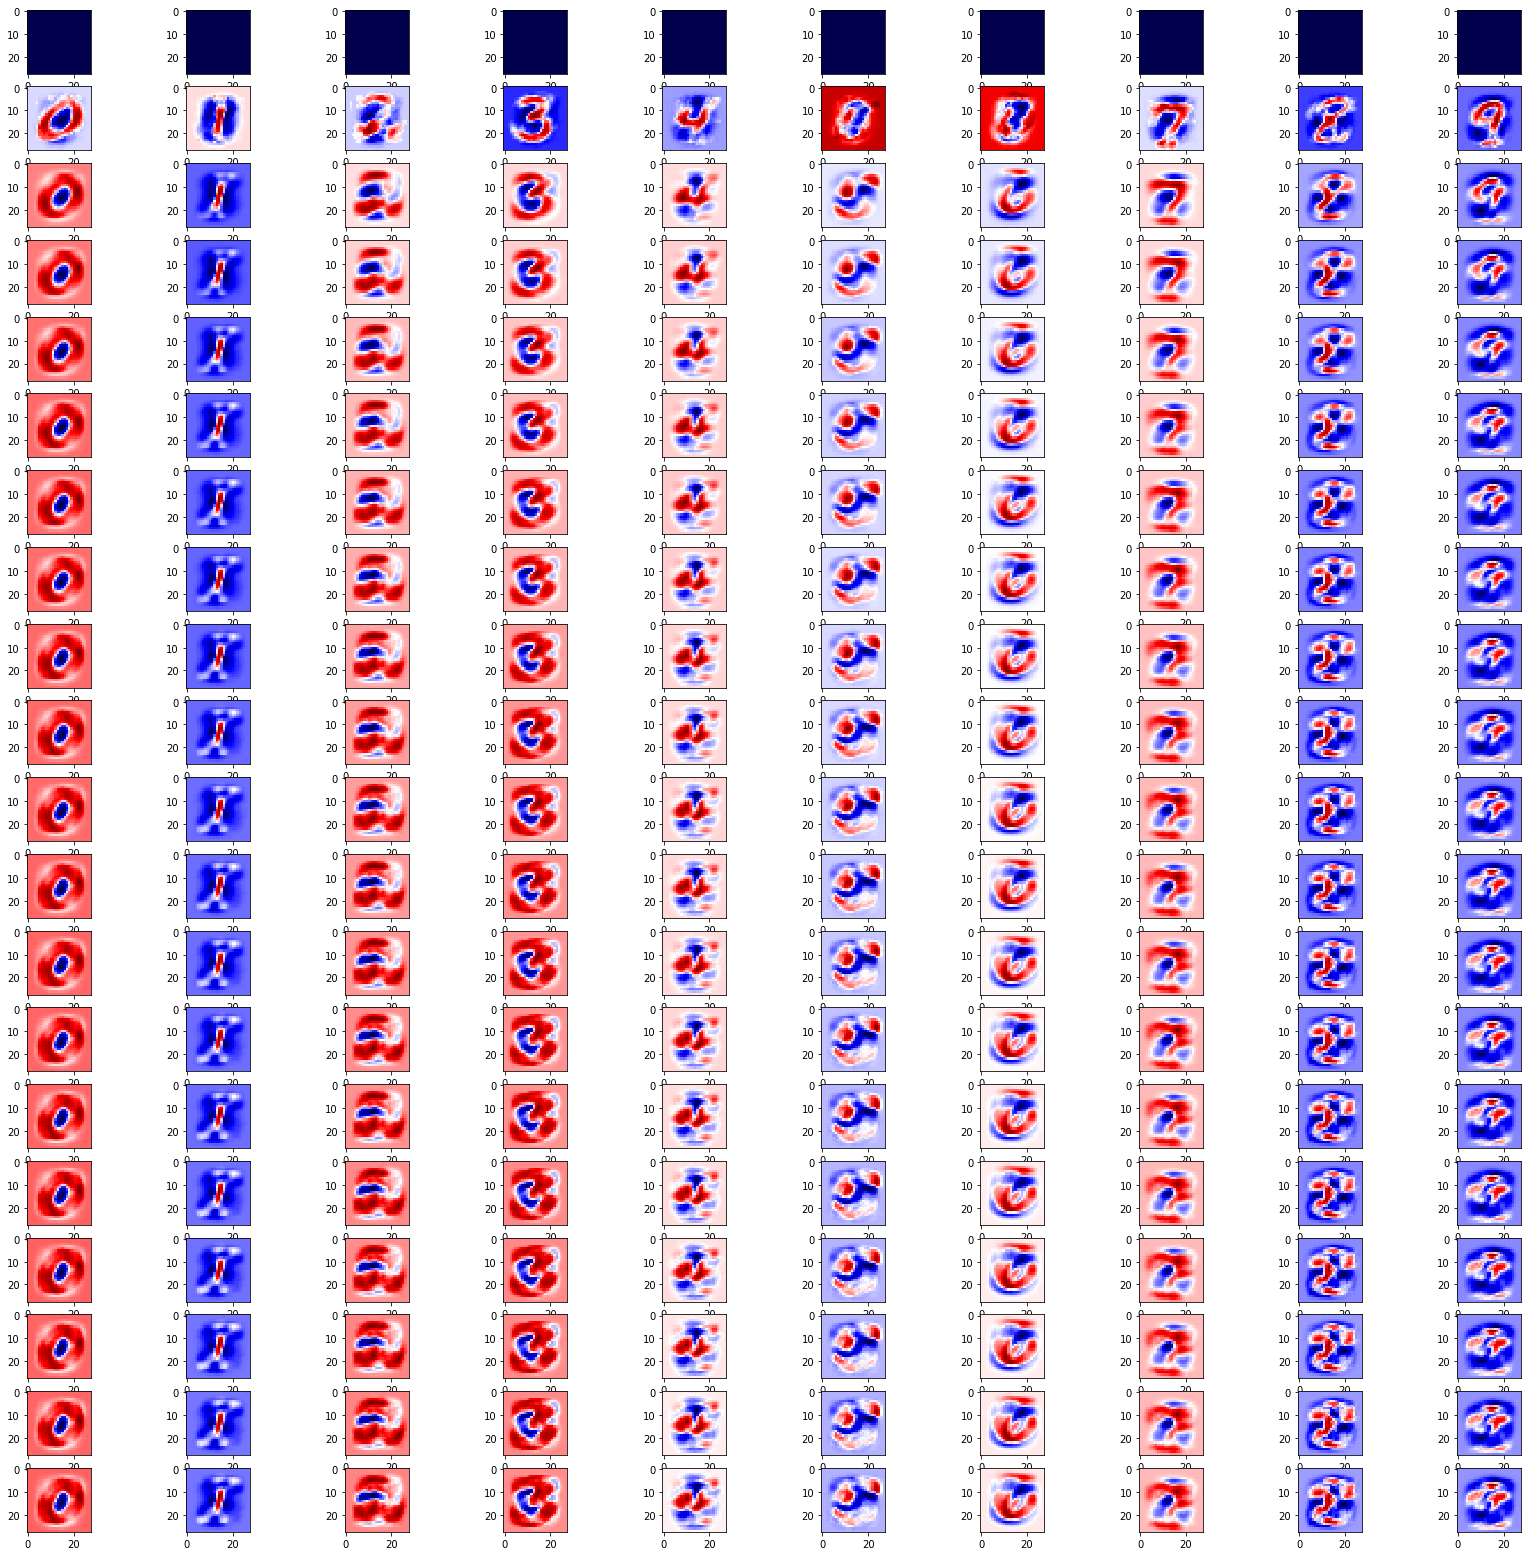

In [20]:
NUMBER_OF_ITERATIONS = 20
showTheWeights(NUMBER_OF_ITERATIONS, W_List)

Now, let's try it on some new random images from the test dataset:

In [21]:
resultTable = tf.placeholder(tf.float32, shape=[None, 10])
final_result = tf.argmax(resultTable,1)
def readable_results(rawTable):
    return(sess.run(final_result, feed_dict={resultTable: rawTable}))
    

def display_wrong_digits(x_test, predicted, true_label):
    wrong_detected_indices = (np.where(predicted!=true_label))[0]
    if (len(wrong_detected_indices)>0):
        for index in wrong_detected_indices:
            image = x_test[index].reshape(28,28)
            result = predicted[index]
            label = true_label[index]
            plt.title('Example Label: ' +  str(label) + ', predicted as: ' + str(result))
            plt.imshow(image, cmap=plt.get_cmap('gray_r'))
            plt.show()
            
    else:
        print('All the images are detected correctly.')
   

Predicted:  [8 4 9 9 1 9 8 6 7 8 8 2 1 8 2 2 7 4 5 9 5 9 1 5 9 5 6 4 0 8]
True Label: [8 4 9 9 1 9 8 6 7 8 8 2 1 8 2 2 7 4 5 9 5 9 1 5 7 5 6 4 0 8]


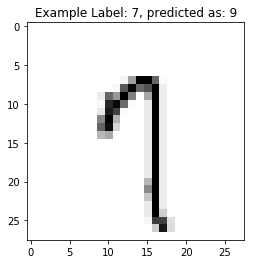

In [22]:
FINAL_TEST_BATCH_SIZE = 30
x_test, y_test = mnist.test.next_batch(FINAL_TEST_BATCH_SIZE)

### EQUATION: y = tf.nn.softmax(tf.matmul(x,W) + b) ###
predicted_values = sess.run(y, feed_dict={x: x_test})


predicted = readable_results(predicted_values)
true_label = readable_results(y_test)
print('Predicted:  ' + ''.join(str(predicted)))
print('True Label: ' + ''.join(str(true_label)))

display_wrong_digits(x_test, predicted, true_label)

## Well, Sometimes it is hard to tell...
<img src="Images/Superhero_Confused.PNG">
